<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Ricardo_Bastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm


## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

### Estrutura da base de dados

- Mostrando os dados e formatos dos dados
- Fazendo limpeza e prepação inicia nos dados  

Carregando base de casos de Covid-19 Fonte: https://brasil.io/dataset/covid19/caso/

---  Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
- 0   date                            data da coleta yyyy-mm-dd
- 1   state                           sigla da unidade federativa, exemplo: SP
- 2   city                            nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
- 3   place_type                      tipo de local que esse registro descreve, pode ser city ou state.
- 4   confirmed                       número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- 5   deaths                          número de mortes
- 6   order_for_place                 tipo de local que esse registro descreve, pode ser city ou state.
- 7   is_last                         campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- 8   estimated_population_2019       população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.
- 9   estimated_population            população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).
- 10  city_ibge_code                  código IBGE do local.
- 11  confirmed_per_100k_inhabitants  número de casos confirmados por 100.000 habitantes (baseado em estimated_population).
- 12  death_rate                      taxa de mortalidade (mortes / confirmados).

In [2]:
data_raw = pd.read_csv('/content/drive/My Drive/Boot Camp Alura/caso.csv')

In [3]:
data_raw.columns 

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [4]:
data = data_raw[[ 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 
       'confirmed_per_100k_inhabitants', 'death_rate']]
data.insert(0,'date',pd.to_datetime(data_raw.date))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950679 entries, 0 to 950678
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            950679 non-null  datetime64[ns]
 1   state                           950679 non-null  object        
 2   city                            944245 non-null  object        
 3   place_type                      950679 non-null  object        
 4   confirmed                       950679 non-null  int64         
 5   deaths                          950679 non-null  int64         
 6   order_for_place                 950679 non-null  int64         
 7   is_last                         950679 non-null  bool          
 8   estimated_population_2019       946976 non-null  float64       
 9   estimated_population            946976 non-null  float64       
 10  confirmed_per_100k_inhabitants  933529 non-null  float64

### Explorando os Casos de covide por uma visão Nacional e Estados

In [6]:
# Filtrando e preparando os dados para as visualizações, visão nacional 

data_states = data[data.place_type=='state']
cases_states = data_states.pivot(index='date',columns='state',values=['confirmed','deaths'])
cases_states.loc['2020-02-25'].fillna(0,inplace=True)
cases_states.fillna(method="ffill",axis=0,inplace=True)
daily_cases_states = cases_states.diff(1)

cases_national = pd.DataFrame()
cases_national['confirmed'] = daily_cases_states['confirmed'].sum(axis=1)
cases_national['deaths'] = daily_cases_states['deaths'].sum(axis=1)
mmean_cases_national = cases_national.rolling(7).mean()

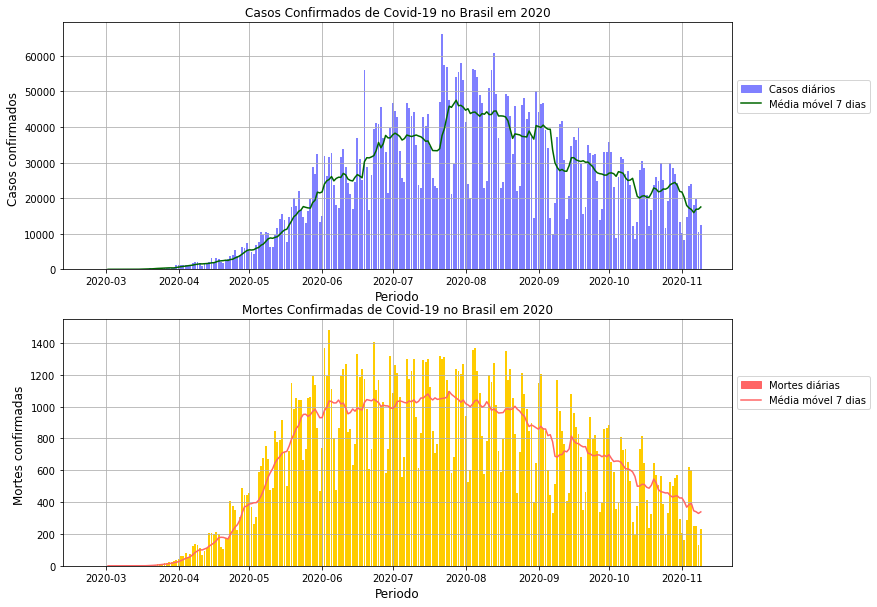

In [7]:
# Gráficos
fig, axis = plt.subplots(2, 1)
fig.set_size_inches((12,10))

# Número de casos
# Formatação do gráfico
axis[0].set_title('Casos Confirmados de Covid-19 no Brasil em 2020')
axis[0].grid(axis='both')
axis[0].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[0].set_ylabel('Casos confirmados ',fontdict={'fontsize':12})
# Incluindo dados
axis[0].bar(cases_national['confirmed'].index,cases_national['confirmed'].values, color=(.5,.5,1))
leg2, = axis[0].plot(mmean_cases_national['confirmed'].index, mmean_cases_national['confirmed'].values, color=(0,.4,0))

# Adicionando legenda 
leg1 = mpatches.Patch(color=(.5,.5,1))
axis[0].legend([leg1,leg2],["Casos diários", 'Média móvel 7 dias'], loc='center left', bbox_to_anchor=(1,.7))

# Número de mortes
# Formatação do gráfico
axis[1].set_title('Mortes Confirmadas de Covid-19 no Brasil em 2020')
axis[1].grid(axis='both')
axis[1].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[1].set_ylabel('Mortes confirmadas ',fontdict={'fontsize':12})
# Incluindo dados
axis[1].bar(cases_national['deaths'].index,cases_national['deaths'].values,  color=(1,.8,0))
leg2, = axis[1].plot(mmean_cases_national['deaths'].index, mmean_cases_national['deaths'].values,color=(1,.4,.4))

# Adicionando legenda 
leg1 = mpatches.Patch(color=(1,.4,.4))
axis[1].legend([leg1,leg2],["Mortes diárias", 'Média móvel 7 dias'], loc='center left', bbox_to_anchor=(1,.7))

plt.show()

Analisando o ambito Nacional e comparando mortes com casos observamos os seguintes pontos:
- O número de casos sobe até 07/2020 quando por 2 semanas eles estabelizam e voltam a subir até atingir o pico em agosto;
- temos uma queda no número de casos no final de 07/2020 por falta de testes
https://www.cnnbrasil.com.br/saude/2020/07/30/ministerio-da-saude-tem-9-8-milhoes-de-testes-parados-por-falta-de-insumos; 
- O número de mortes sobe mais rapidamente até 06/2020 ficando estável em mais de 1000 mortes por dia até o final de 08/2020 quando começamos a ver uma tendencia de queda;


In [17]:
daily_confirmed_states = daily_cases_states['confirmed']
daily_deaths_states = daily_cases_states['deaths']
# Filtrando e preparando os dados para as visualizações, visão por Região

dc_north = daily_confirmed_states[['AC','AM','RO','TO','RR','PA','AP']].sum(axis=1)
mc_north = dc_north.rolling(7).mean()
dc_northeast = daily_confirmed_states[['AL','BA','CE','MA','PB','PE','PI','RN','PI']].sum(axis=1)
mc_northeast = dc_northeast.rolling(7).mean()
dc_southeast = daily_confirmed_states[['ES','MG','RJ','SP']].sum(axis=1)
mc_southeast = dc_southeast.rolling(7).mean()
dc_south = daily_confirmed_states[['PR','RS','SC']].sum(axis=1)
mc_south = dc_south.rolling(7).mean() 
dc_centerwest = daily_confirmed_states[['GO','MT','MS']].sum(axis=1)
mc_centerwest = dc_centerwest.rolling(7).mean()

dd_north = daily_deaths_states[['AC','AM','RO','TO','RR','PA','AP']].sum(axis=1)
md_north = dd_north.rolling(7).mean()
dd_northeast = daily_deaths_states[['AL','BA','CE','MA','PB','PE','PI','RN','PI']].sum(axis=1)
md_northeast = dd_northeast.rolling(7).mean()
dd_southeast = daily_deaths_states[['ES','MG','RJ','SP']].sum(axis=1)
md_southeast = dd_southeast.rolling(7).mean()
dd_south = daily_deaths_states[['PR','RS','SC']].sum(axis=1)
md_south = dd_south.rolling(7).mean() 
dd_centerwest = daily_deaths_states[['GO','MT','MS']].sum(axis=1)
md_centerwest = dd_centerwest.rolling(7).mean()

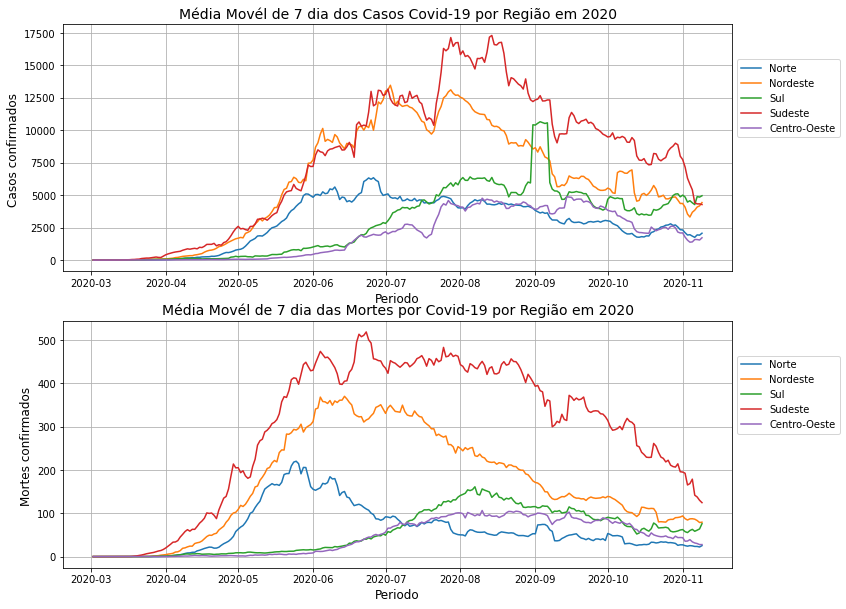

In [19]:
# Gráficos
fig, axis = plt.subplots(2, 1)
fig.set_size_inches((12,10))

# Formatação do gráfico
axis[0].grid(axis='both')
axis[0].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[0].set_ylabel('Casos confirmados ',fontdict={'fontsize':12})
axis[0].set_title('Média Movél de 7 dia dos Casos Covid-19 por Região em 2020',fontdict={'fontsize':14})
plt.set_cmap(cm.Dark2)

# Incluindo dados
legN, = axis[0].plot(mc_north.index, mc_north.values,)
legNE, = axis[0].plot(mc_northeast.index, mc_northeast.values)
legS, = axis[0].plot(mc_south.index, mc_south.values)
legSE, = axis[0].plot(mc_southeast.index, mc_southeast.values)
legCO, = axis[0].plot(mc_centerwest.index, mc_centerwest.values)
# Adicionando legenda 
axis[0].legend([legN,legNE,legS,legSE,legCO],['Norte','Nordeste','Sul','Sudeste','Centro-Oeste'], loc='center left', bbox_to_anchor=(1,.7))

# Formatação do gráfico
axis[1].grid(axis='both')
axis[1].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[1].set_ylabel('Mortes confirmados ',fontdict={'fontsize':12})
axis[1].set_title('Média Movél de 7 dia das Mortes por Covid-19 por Região em 2020',fontdict={'fontsize':14})
axis[1].Ti
plt.set_cmap(cm.Dark2)

# Incluindo dados
legN, = axis[1].plot(md_north.index, md_north.values,)
legNE, = axis[1].plot(md_northeast.index, md_northeast.values)
legS, = axis[1].plot(md_south.index, md_south.values)
legSE, = axis[1].plot(md_southeast.index, md_southeast.values)
legCO, = axis[1].plot(md_centerwest.index, md_centerwest.values)
# Adicionando legenda 
axis[1].legend([legN,legNE,legS,legSE,legCO],['Norte','Nordeste','Sul','Sudeste','Centro-Oeste'], loc='center left', bbox_to_anchor=(1,.7))
plt.show()


Existems diferenças claras nas médias móveis das regiões. Podemos notar que a aceleração nas regiões Sudeste, Nordeste e Norte é bem 